# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

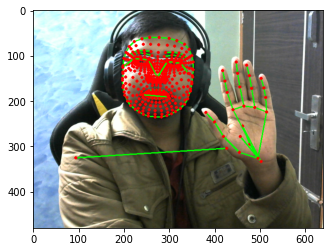

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
print(np)

<module 'numpy' from 'a:\\python\\lib\\site-packages\\numpy\\__init__.py'>


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.42861003,  0.31000477, -0.82711184, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.42861003,  0.31000477, -0.82711184, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
dic="EXP"
present_dir="E:/FinalProject/"
DATA_PATH = os.path.join(present_dir,dic) 
os.mkdir(DATA_PATH)


# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [20]:
for action in actions: 
   # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            print("already exit")

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 518ms/step - loss: 1.9016 - categorical_accuracy: 0.3405
Epoch 2/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1596 - categorical_accuracy: 0.2994
Epoch 3/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.8438 - categorical_accuracy: 0.2544
Epoch 4/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1206 - categorical_accuracy: 0.3484
Epoch 5/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.4617 - categorical_accuracy: 0.3112
Epoch 6/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1911 - categorical_accuracy: 0.2935
Epoch 7/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1255 - categorical_accuracy: 0.2721
Epoch 8/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1273 - categorical_accuracy: 0.4208
Epoch 9/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2745 - categorical_accuracy: 0.2466


3/3 [==============================] - 0s 68ms/step - loss: 0.7757 - categorical_accuracy: 0.5871
Epoch 74/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.8188 - categorical_accuracy: 0.5754
Epoch 75/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7356 - categorical_accuracy: 0.6047
Epoch 76/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.6878 - categorical_accuracy: 0.5578
Epoch 77/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6366 - categorical_accuracy: 0.6046
Epoch 78/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6592 - categorical_accuracy: 0.6909
Epoch 79/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6620 - categorical_accuracy: 0.6732
Epoch 80/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6196 - categorical_accuracy: 0.6692
Epoch 81/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6216 - categorical_accuracy: 0.6829
Epoch 

3/3 [==============================] - 0s 70ms/step - loss: 0.5859 - categorical_accuracy: 0.7104
Epoch 146/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4149 - categorical_accuracy: 0.8982
Epoch 147/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3830 - categorical_accuracy: 0.8631
Epoch 148/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.6412 - categorical_accuracy: 0.7828
Epoch 149/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5750 - categorical_accuracy: 0.7320
Epoch 150/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4759 - categorical_accuracy: 0.8141
Epoch 151/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.5016 - categorical_accuracy: 0.8337
Epoch 152/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.3878 - categorical_accuracy: 0.8571
Epoch 153/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3475 - categorical_accuracy: 0.866

3/3 [==============================] - 0s 84ms/step - loss: 14.9302 - categorical_accuracy: 0.3151
Epoch 218/2000
3/3 [==============================] - 0s 85ms/step - loss: 17.6497 - categorical_accuracy: 0.3894
Epoch 219/2000
3/3 [==============================] - 0s 78ms/step - loss: 11.6072 - categorical_accuracy: 0.3151
Epoch 220/2000
3/3 [==============================] - 0s 76ms/step - loss: 10.7946 - categorical_accuracy: 0.3268
Epoch 221/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.6859 - categorical_accuracy: 0.3835
Epoch 222/2000
3/3 [==============================] - 0s 75ms/step - loss: 11.4897 - categorical_accuracy: 0.3229
Epoch 223/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.5678 - categorical_accuracy: 0.3679
Epoch 224/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.2510 - categorical_accuracy: 0.3739
Epoch 225/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.7467 - categorical_accuracy: 

3/3 [==============================] - 0s 72ms/step - loss: 1.0994 - categorical_accuracy: 0.3425
Epoch 290/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0952 - categorical_accuracy: 0.3737
Epoch 291/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1023 - categorical_accuracy: 0.3268
Epoch 292/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1001 - categorical_accuracy: 0.2818
Epoch 293/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0998 - categorical_accuracy: 0.3131
Epoch 294/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1011 - categorical_accuracy: 0.3092
Epoch 295/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0999 - categorical_accuracy: 0.3171
Epoch 296/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0996 - categorical_accuracy: 0.2564
Epoch 297/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1063 - categorical_accuracy: 0.311

3/3 [==============================] - 0s 82ms/step - loss: 1.1058 - categorical_accuracy: 0.3268
Epoch 362/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0983 - categorical_accuracy: 0.3483
Epoch 363/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1011 - categorical_accuracy: 0.3092
Epoch 364/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0989 - categorical_accuracy: 0.3425
Epoch 365/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0980 - categorical_accuracy: 0.3503
Epoch 366/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0998 - categorical_accuracy: 0.3347
Epoch 367/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1014 - categorical_accuracy: 0.3131
Epoch 368/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0997 - categorical_accuracy: 0.3601
Epoch 369/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0993 - categorical_accuracy: 0.330

3/3 [==============================] - 0s 76ms/step - loss: 1.0978 - categorical_accuracy: 0.3425
Epoch 434/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1024 - categorical_accuracy: 0.2505
Epoch 435/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0997 - categorical_accuracy: 0.2838
Epoch 436/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1005 - categorical_accuracy: 0.3268
Epoch 437/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0985 - categorical_accuracy: 0.3542
Epoch 438/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0985 - categorical_accuracy: 0.3503
Epoch 439/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0970 - categorical_accuracy: 0.2975
Epoch 440/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1027 - categorical_accuracy: 0.2975
Epoch 441/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0998 - categorical_accuracy: 0.33

3/3 [==============================] - 0s 79ms/step - loss: 1.0968 - categorical_accuracy: 0.3347
Epoch 506/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.1003 - categorical_accuracy: 0.4520
Epoch 507/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0981 - categorical_accuracy: 0.4011
Epoch 508/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.1012 - categorical_accuracy: 0.3347
Epoch 509/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.1009 - categorical_accuracy: 0.3386
Epoch 510/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1040 - categorical_accuracy: 0.3347
Epoch 511/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0954 - categorical_accuracy: 0.3620
Epoch 512/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0939 - categorical_accuracy: 0.3777
Epoch 513/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1002 - categorical_accuracy: 0.32

3/3 [==============================] - 0s 63ms/step - loss: 1.0945 - categorical_accuracy: 0.3854
Epoch 578/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1010 - categorical_accuracy: 0.3386
Epoch 579/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0963 - categorical_accuracy: 0.3287
Epoch 580/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0992 - categorical_accuracy: 0.3131
Epoch 581/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1005 - categorical_accuracy: 0.3072
Epoch 582/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0974 - categorical_accuracy: 0.2935
Epoch 583/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1006 - categorical_accuracy: 0.2955
Epoch 584/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0990 - categorical_accuracy: 0.4442
Epoch 585/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0955 - categorical_accuracy: 0.365

3/3 [==============================] - 0s 67ms/step - loss: 1.0946 - categorical_accuracy: 0.3698
Epoch 650/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0956 - categorical_accuracy: 0.3581
Epoch 651/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0978 - categorical_accuracy: 0.3131
Epoch 652/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0958 - categorical_accuracy: 0.4148
Epoch 653/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0984 - categorical_accuracy: 0.3737
Epoch 654/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0958 - categorical_accuracy: 0.4520
Epoch 655/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0968 - categorical_accuracy: 0.4108
Epoch 656/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0957 - categorical_accuracy: 0.3738
Epoch 657/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0998 - categorical_accuracy: 0.395

3/3 [==============================] - 0s 74ms/step - loss: 1.0995 - categorical_accuracy: 0.2857
Epoch 722/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0947 - categorical_accuracy: 0.3718
Epoch 723/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0968 - categorical_accuracy: 0.4442
Epoch 724/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0980 - categorical_accuracy: 0.4324
Epoch 725/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0965 - categorical_accuracy: 0.3347
Epoch 726/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0975 - categorical_accuracy: 0.3366
Epoch 727/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0963 - categorical_accuracy: 0.3464
Epoch 728/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0979 - categorical_accuracy: 0.3347
Epoch 729/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0989 - categorical_accuracy: 0.330

3/3 [==============================] - 0s 80ms/step - loss: 1.0964 - categorical_accuracy: 0.3347
Epoch 794/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0875 - categorical_accuracy: 0.3854
Epoch 795/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0921 - categorical_accuracy: 0.3718
Epoch 796/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0992 - categorical_accuracy: 0.4011
Epoch 797/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1010 - categorical_accuracy: 0.3327
Epoch 798/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.1042 - categorical_accuracy: 0.3073
Epoch 799/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0996 - categorical_accuracy: 0.3699
Epoch 800/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0970 - categorical_accuracy: 0.3288
Epoch 801/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0984 - categorical_accuracy: 0.356

3/3 [==============================] - 0s 62ms/step - loss: 1.0921 - categorical_accuracy: 0.3581
Epoch 866/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1003 - categorical_accuracy: 0.3229
Epoch 867/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0951 - categorical_accuracy: 0.3639
Epoch 868/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0954 - categorical_accuracy: 0.3444
Epoch 869/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0943 - categorical_accuracy: 0.3308
Epoch 870/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0969 - categorical_accuracy: 0.3542
Epoch 871/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1046 - categorical_accuracy: 0.3190
Epoch 872/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1018 - categorical_accuracy: 0.3170
Epoch 873/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1026 - categorical_accuracy: 0.283

3/3 [==============================] - 0s 62ms/step - loss: 1.0916 - categorical_accuracy: 0.3680
Epoch 938/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0971 - categorical_accuracy: 0.3034
Epoch 939/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0946 - categorical_accuracy: 0.3386
Epoch 940/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1129 - categorical_accuracy: 0.3268
Epoch 941/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0905 - categorical_accuracy: 0.3718
Epoch 942/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0906 - categorical_accuracy: 0.3738
Epoch 943/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0918 - categorical_accuracy: 0.4344
Epoch 944/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0911 - categorical_accuracy: 0.3659
Epoch 945/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0901 - categorical_accuracy: 0.356

3/3 [==============================] - 0s 70ms/step - loss: 1.0911 - categorical_accuracy: 0.3405
Epoch 1010/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0895 - categorical_accuracy: 0.3640
Epoch 1011/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0871 - categorical_accuracy: 0.4657
Epoch 1012/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0873 - categorical_accuracy: 0.4051
Epoch 1013/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0872 - categorical_accuracy: 0.3288
Epoch 1014/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1004 - categorical_accuracy: 0.3503
Epoch 1015/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0946 - categorical_accuracy: 0.3855
Epoch 1016/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0926 - categorical_accuracy: 0.3405
Epoch 1017/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0833 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.0806 - categorical_accuracy: 0.4305
Epoch 1081/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0759 - categorical_accuracy: 0.3504
Epoch 1082/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0847 - categorical_accuracy: 0.3327
Epoch 1083/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0853 - categorical_accuracy: 0.3680
Epoch 1084/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0823 - categorical_accuracy: 0.3425
Epoch 1085/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0664 - categorical_accuracy: 0.4207
Epoch 1086/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0857 - categorical_accuracy: 0.3815
Epoch 1087/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0430 - categorical_accuracy: 0.4872
Epoch 1088/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1434 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0708 - categorical_accuracy: 0.2623
Epoch 1152/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0605 - categorical_accuracy: 0.3444
Epoch 1153/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0640 - categorical_accuracy: 0.4579
Epoch 1154/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0690 - categorical_accuracy: 0.4697
Epoch 1155/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0539 - categorical_accuracy: 0.4011
Epoch 1156/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0667 - categorical_accuracy: 0.5440
Epoch 1157/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0613 - categorical_accuracy: 0.4187
Epoch 1158/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1086 - categorical_accuracy: 0.3954
Epoch 1159/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0638 - categorical_accurac

3/3 [==============================] - 0s 85ms/step - loss: 1.0933 - categorical_accuracy: 0.3581
Epoch 1223/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0929 - categorical_accuracy: 0.3150
Epoch 1224/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0924 - categorical_accuracy: 0.2896
Epoch 1225/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0928 - categorical_accuracy: 0.2779
Epoch 1226/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0955 - categorical_accuracy: 0.3385
Epoch 1227/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0938 - categorical_accuracy: 0.3249
Epoch 1228/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0907 - categorical_accuracy: 0.3639
Epoch 1229/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0912 - categorical_accuracy: 0.3523
Epoch 1230/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0952 - categorical_accura

Epoch 1294/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0888 - categorical_accuracy: 0.3013
Epoch 1295/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0886 - categorical_accuracy: 0.2114
Epoch 1296/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0872 - categorical_accuracy: 0.3953
Epoch 1297/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0855 - categorical_accuracy: 0.3737
Epoch 1298/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0898 - categorical_accuracy: 0.3777
Epoch 1299/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0906 - categorical_accuracy: 0.3640
Epoch 1300/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0889 - categorical_accuracy: 0.4461
Epoch 1301/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0882 - categorical_accuracy: 0.4168
Epoch 1302/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0889 - cat

3/3 [==============================] - 0s 69ms/step - loss: 1.0730 - categorical_accuracy: 0.3718
Epoch 1366/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0768 - categorical_accuracy: 0.3563
Epoch 1367/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0649 - categorical_accuracy: 0.4403
Epoch 1368/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0707 - categorical_accuracy: 0.3680
Epoch 1369/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0634 - categorical_accuracy: 0.5225
Epoch 1370/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0538 - categorical_accuracy: 0.6653
Epoch 1371/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0518 - categorical_accuracy: 0.6457
Epoch 1372/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0507 - categorical_accuracy: 0.5753
Epoch 1373/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0556 - categorical_accurac

3/3 [==============================] - 0s 70ms/step - loss: 0.9447 - categorical_accuracy: 0.5088
Epoch 1437/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9366 - categorical_accuracy: 0.5362
Epoch 1438/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.8741 - categorical_accuracy: 0.5969
Epoch 1439/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.8641 - categorical_accuracy: 0.5538
Epoch 1440/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8551 - categorical_accuracy: 0.5830
Epoch 1441/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8131 - categorical_accuracy: 0.5831
Epoch 1442/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8847 - categorical_accuracy: 0.5441
Epoch 1443/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.8086 - categorical_accuracy: 0.6477
Epoch 1444/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.8269 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 0.7718 - categorical_accuracy: 0.6439
Epoch 1507/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.7712 - categorical_accuracy: 0.6126
Epoch 1508/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7494 - categorical_accuracy: 0.6575
Epoch 1509/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.7627 - categorical_accuracy: 0.6008
Epoch 1510/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.7500 - categorical_accuracy: 0.7045
Epoch 1511/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8491 - categorical_accuracy: 0.5187
Epoch 1512/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7811 - categorical_accuracy: 0.5402
Epoch 1513/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.7229 - categorical_accuracy: 0.6184
Epoch 1514/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6894 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.6865 - categorical_accuracy: 0.6419
Epoch 1579/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9912 - categorical_accuracy: 0.4756
Epoch 1580/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9452 - categorical_accuracy: 0.5206
Epoch 1581/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8957 - categorical_accuracy: 0.6008
Epoch 1582/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.8323 - categorical_accuracy: 0.5400
Epoch 1583/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8411 - categorical_accuracy: 0.7006
Epoch 1584/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9228 - categorical_accuracy: 0.6302
Epoch 1585/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8113 - categorical_accuracy: 0.5147
Epoch 1586/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7685 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 0.7222 - categorical_accuracy: 0.6457
Epoch 1650/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8632 - categorical_accuracy: 0.5537
Epoch 1651/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.7386 - categorical_accuracy: 0.6243
Epoch 1652/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.8300 - categorical_accuracy: 0.5402
Epoch 1653/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9287 - categorical_accuracy: 0.4756
Epoch 1654/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.7062 - categorical_accuracy: 0.7534
Epoch 1655/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.8909 - categorical_accuracy: 0.5148
Epoch 1656/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7954 - categorical_accuracy: 0.5362
Epoch 1657/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.7520 - categorical_accurac

Epoch 1721/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6107 - categorical_accuracy: 0.7221
Epoch 1722/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8040 - categorical_accuracy: 0.5773
Epoch 1723/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6820 - categorical_accuracy: 0.7045
Epoch 1724/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.7830 - categorical_accuracy: 0.6008
Epoch 1725/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6727 - categorical_accuracy: 0.7221
Epoch 1726/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8150 - categorical_accuracy: 0.5362
Epoch 1727/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.8108 - categorical_accuracy: 0.5813
Epoch 1728/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.7530 - categorical_accuracy: 0.4913
Epoch 1729/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.6748 - cat

3/3 [==============================] - 0s 71ms/step - loss: 0.5534 - categorical_accuracy: 0.8043
Epoch 1793/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5296 - categorical_accuracy: 0.8043
Epoch 1794/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4961 - categorical_accuracy: 0.7690
Epoch 1795/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5718 - categorical_accuracy: 0.7632
Epoch 1796/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5008 - categorical_accuracy: 0.8023
Epoch 1797/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5410 - categorical_accuracy: 0.7553
Epoch 1798/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0719 - categorical_accuracy: 0.5088
Epoch 1799/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.3124 - categorical_accuracy: 0.4561
Epoch 1800/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.4723 - categorical_accura

3/3 [==============================] - 0s 69ms/step - loss: 0.8162 - categorical_accuracy: 0.5558
Epoch 1864/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.7223 - categorical_accuracy: 0.5578
Epoch 1865/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.7766 - categorical_accuracy: 0.5519
Epoch 1866/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7891 - categorical_accuracy: 0.5225
Epoch 1867/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7923 - categorical_accuracy: 0.5343
Epoch 1868/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.8451 - categorical_accuracy: 0.5226
Epoch 1869/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7695 - categorical_accuracy: 0.5440
Epoch 1870/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8299 - categorical_accuracy: 0.5264
Epoch 1871/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7852 - categorical_accurac

Epoch 1935/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7613 - categorical_accuracy: 0.6028
Epoch 1936/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7670 - categorical_accuracy: 0.7104
Epoch 1937/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7253 - categorical_accuracy: 0.6301
Epoch 1938/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7531 - categorical_accuracy: 0.5617
Epoch 1939/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7729 - categorical_accuracy: 0.5930
Epoch 1940/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7945 - categorical_accuracy: 0.5285
Epoch 1941/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7262 - categorical_accuracy: 0.6477
Epoch 1942/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7428 - categorical_accuracy: 0.6536
Epoch 1943/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7632 - ca

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [39]:
res = model.predict(X_test)

In [44]:
actions[np.argmax(res[0])]

'hello'

In [46]:
actions[np.argmax(y_test[0])]

'iloveyou'

# 9. Save Weights

In [31]:
model.save('action.h5')

In [217]:
del model

In [14]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [1, 0]],

       [[3, 0],
        [0, 2]],

       [[2, 1],
        [1, 1]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [52]:
from scipy import stats

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapip

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'medi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediap